In [15]:
# import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

fashion_dataset = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_dataset.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [16]:
train_images.shape

(60000, 28, 28)

In [17]:
train_images[0, 23, 23]

194

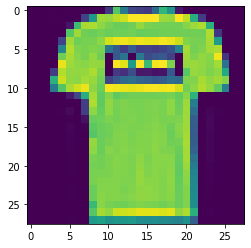

In [26]:
# Plot images
plt.figure()
plt.imshow(train_images[1])

In [ ]:
# Preprocess data - scale greyscale pixel values (0-255) to be between 0 and 1
train_images = train_images / 255.0

test_images = test_images / 255.0

In [35]:
# Build model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # Input layer
    keras.layers.Dense(128, activation='relu'), # Hidden layer
    keras.layers.Dense(10, activation='softmax') # Output layer
])

# Compile model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Train model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.1008 - accuracy: 0.6665
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6456 - accuracy: 0.7673
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5702 - accuracy: 0.7957: 0s - loss: 0.5733 - accu
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5268 - accuracy: 0.8128
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4980 - accuracy: 0.8240
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4766 - accuracy: 0.8333
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4614 - accuracy: 0.8382
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4482 - accuracy: 0.8428
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4384 - accuracy: 0.8458
Epoch 10/10
1875/1875 [==============================] -

In [36]:
# Evaluate loss and accuracy using test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print("Test accuracy: {}".format(test_acc))

313/313 [==============================] - 0s 790us/step - loss: 0.4623 - accuracy: 0.8324
Test accuracy: 0.8324000239372253


Prediction: Ankle boot 
Actual label: Ankle boot


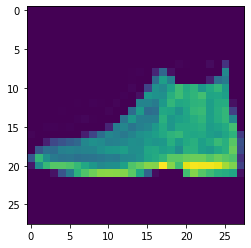

In [53]:
pred = model.predict(test_images)

print("Prediction: {} \nActual label: {}".format(class_names[np.argmax(pred[0])], class_names[test_labels[0]]))
plt.imshow(test_images[0])